<a href="https://colab.research.google.com/github/saikumar888-dot/Language-Detection-using-Basic-Machine-Learning-Algorithms-/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all important libraries
import pandas as pd # helps with data analyisis
import numpy as np  # mathematical functions
import re # characters that form a speech pattern
import seaborn as sns # data visulaization
import matplotlib.pyplot as plt # data visulaization
from langdetect import detect, detect_langs # Import the detect and detect_langs functions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#import warnings
#warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/Language Detection.csv")
data.head()


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
# counting  values of all languages
value_count = data["Language"].value_counts()
print(value_count)

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64


In [ ]:
# seperate independent/x + dependent/y variables
independent = data["Text"]
dependent = data["Language"]

In [ ]:

# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dependent = label_encoder.fit_transform(dependent)

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# go through all text
for text in independent:
    # remove all symbols and numbers (if any)
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # convert all text to lowercase
    text = text.lower()
    # appending to the list created above
    data_list.append(text)

<ipython-input-8-75e4a5e12d04>:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [ ]:
#  a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
independent = cv.fit_transform(data_list).toarray()
independent.shape

(10337, 34937)

In [ ]:
# split train and testing dataset
from sklearn.model_selection import train_test_split
i_train, i_test,  d_train, d_test = train_test_split(independent, dependent, test_size=0.1)


In [ ]:
# Assuming 'independent' contains features and 'dependent' contains labels
# Split the data into training and testing sets
i_train, i_test, d_train, d_test = train_test_split(independent, dependent, test_size=0.1, random_state=42)
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()
# Train the model on the training data
logistic_model.fit(i_train, d_train)
# Make predictions on the test data
d_pred = logistic_model.predict(i_test)


In [ ]:
# evalute the accuracy of our model
ac = accuracy_score(d_test, d_pred)
cm = confusion_matrix(d_test, d_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9564796905222437


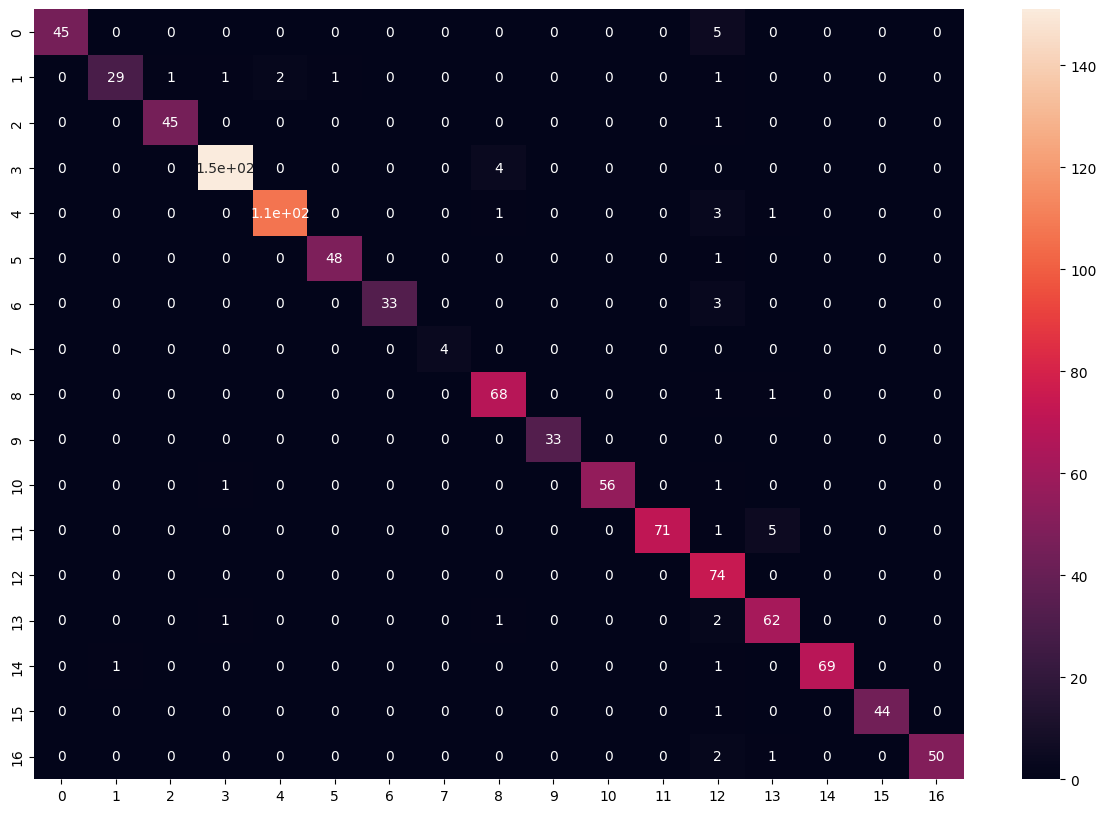

In [ ]:
# plot the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
#predict the data
def predict(text):
  independent = cv.transform([text]).toarray()
  # convert text to bag of words model
  # Use 'logistic_model' instead of 'model'
  lang = logistic_model.predict(independent)
  # predict the language
  lang = label_encoder.inverse_transform(lang)
  # find the language that relates to the predicted value
  print("The langauge is in", lang[0]) # print the language!

In [ ]:
predict("Я люблю программировать")

The langauge is in Russian


In [ ]:
predict("Οὔ μοι δοκεῖς καλῶς τὴν ἐμὴν συνιέναι γνώμην (οὐ γὰρ ἂν τὸ δεύτερον ἐπέστελλες καὶ πλείονα δώσειν ὑπισχνοῦ) ἀλλ’, ὥσπερ τοὺς σοφιστάς, καὶ Σωκράτην φαίνῃ ὑπονοεῖν παλιμπράτην τινὰ εἶναι παιδείας καὶ τὰ πρότερον γράψαι οὐχ ἁπλῶς ἀρνούμενον, ἀλλ’ ἐπὶ πλείοσι τῶν τότε διδομένων ὑπὸ σοῦ. νῦν δ’ οὖν ὑπερβολὰς ὑπισχνῇ καὶ τῷ πλήθει τῶν διδομένων οἴει με παραστήσεσθαι, καταλιπόντα τε τὴν Ἀθήνησι διατριβὴν παρὰ σὲ ἥξειν τὸν οὔθ’ ὅλως καλὸν νομίζοντα τοὺς ἐν φιλοσοφίᾳ πιπράσκειν λόγους, ἐμοί τε καὶ σφόδρα ἄηθες.")

The langauge is in Greek


In [ ]:
predict("أنا سعيد لأنني انتهيت من النسخ المتماثل")

The langauge is in Arabic


In [ ]:
predict("hi this is my NLP project")

The langauge is in English


In [ ]:
predict("J'ai une petite famille. Il y a quatre membres. Mon pere, ma mere, mon frere et moi. Mon pere s'appelle xyz. Il est comptable chatere. Il a xyz ans. Il est gentille est sympathique. Ma mere s'appelle abc. Elle est ménagère. Elle est xyz ans. Elle est belle et intelligent. Mon frere s'appelle mnl. Il est neuf ans. C'est son anniversaire aujourd'hui. Il est etudiant. Il est mignon et mechant. J'aime beaucoup ma famille")

The langauge is in French


In [ ]:
predict("Mein Name ist Roger Rabbit. Ich bin einundzwanzig Jahre alt. Ich wohne in Birmingham. Ich lebe in Birmingham fur drei Monate. Ich komme aus London in England. Ich bin studentin (I'm male is studentin correct?) und ich studiere Erdkunde. Ich studiere erst zwei Monate. Ich habe keine Kinder. Ich habe zwei Hobbys, sind sie Leichtathletik und Fußball spielen")

The langauge is in German


In [ ]:
predict("Yo tengo una mascota. Ella es una gata, y su nombre es Catty. Mi gata no es joven pero ella es muy bonita. Ella tiene doce anos. Ella es grande y gris. Ella encante comer.")

The langauge is in Spanish


In [ ]:
predict("Deze zondag was de beste dag in mijn leven - de zon scheen de hele dag, en mijn beste vriend gaf me een nieuw boek. Ik at pizza en dronk ijskoud bier, zij at pasta en dronk rode wijn")

The langauge is in Dutch


In [ ]:
predict("பல நூற்றாண்டுகளாக செய்யுள் வடிவமே தமிழ் இலக்கியங்களிலும், தத்துவங்களிலும் பயன்படுத்தப்பட்டது. உரை வடிவம் இலக்கணங்களுக்கும், செய்யுள் விளக்கம் கூறவதற்கும், சாசனங்கள் (record) பதிவு செய்வதற்கும் பயன்படுத்தப்பட்டது. 20ஆம் நூற்றாண்டிலேயே உரை வடிவம் வளர்ச்சி பெற்று, மக்களின் பல்வேறுபட்ட தேவைகளுக்கும் பயன்படுகின்றது. கட்டுரையே உரைநடை வெளிப்பாட்டின் முக்கிய வடிவம் ஆகும்.")

The langauge is in Tamil


In [ ]:
predict("Alguns textos en català com aquest.")


The langauge is in Portugeese


In [ ]:
predict("कई बार लोगों द्वारा यह प्रश्न पूछा जाता है कि आखिर निबंध क्या है? और निबंध की परिभाषा क्या है? वास्तव में निबंध एक प्रकार की गद्य रचना होती है। जिसे क्रमबद्ध तरीके से लिखा गया हो।")

The langauge is in Hindi


In [ ]:
predict("സ്വതന്ത്ര ഓൺലൈൻ വിജ്ഞാനകോശമായ വിക്കിപീഡിയയുടെ മലയാള ഭാഷാ പതിപ്പാണ് മലയാളം വിക്കിപീഡിയ.[1] അറിവു പങ്കു വയ്ക്കുക, വിജ്ഞാനം സ്വതന്ത്രമാക്കുക എന്നീ ലക്ഷ്യങ്ങളോടെ ഉയർന്ന ഗുണമേന്മയുള്ള വിജ്ഞാനകോശം സൃഷ്ടിക്കണമെന്ന് ആഗ്രഹിക്കുന്ന പരസ്പരബഹുമാനവും, വിജ്ഞാനതൃഷ്ണയുമുള്ള ഓൺലൈൻ സമൂഹമാണ് മലയാളം വിക്കിപീഡിയയുടെ പിന്നിൽ പ്രവർത്തിക്കുന്നത്.")

The langauge is in Malayalam


In [ ]:
predict("ಪುರಾತನ ಹಸ್ತಪ್ರತಿಗಳು ವಾಕ್ಯಗಳನ್ನು ಲೈನ್ ಬ್ರೇಕ್‌ಗಳೊಂದಿಗೆ ಪ್ಯಾರಾಗ್ರಾಫ್‌ಗಳಾಗಿ ವಿಂಗಡಿಸಲಾಗಿದೆ ( ಹೊಸ ಲೈನ್ ) ನಂತರ ಮುಂದಿನ ಪ್ಯಾರಾಗ್ರಾಫ್‌ನ ಆರಂಭದಲ್ಲಿ ಇನಿಶಿಯಲ್")

The langauge is in Kannada
